<a href="https://colab.research.google.com/github/Chiragjain2525/Google-Colab-Code/blob/main/Basic_stats_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the dataset
file_path = "sales_data_with_discounts.csv"
df = pd.read_csv(file_path)

In [ ]:
df.notnull()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,True,True,True,True,True,True,True,True,True,True,True,True,True
446,True,True,True,True,True,True,True,True,True,True,True,True,True
447,True,True,True,True,True,True,True,True,True,True,True,True,True
448,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
# Identify numerical and categorical columns
numerical_cols = ["Volume", "Avg Price", "Total Sales Value", "Discount Rate (%)", "Discount Amount", "Net Sales Value"]
categorical_cols = ["SKU", "City", "BU", "Brand", "Model"]

In [ ]:
# Compute descriptive statistics
statistics = pd.DataFrame({
    "Mean": df[numerical_cols].mean(),
    "Median": df[numerical_cols].median(),
    "Mode": df[numerical_cols].mode().iloc[0],
    "Std Dev": df[numerical_cols].std()
})
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
                           Mean       Median          Mode       Std Dev
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


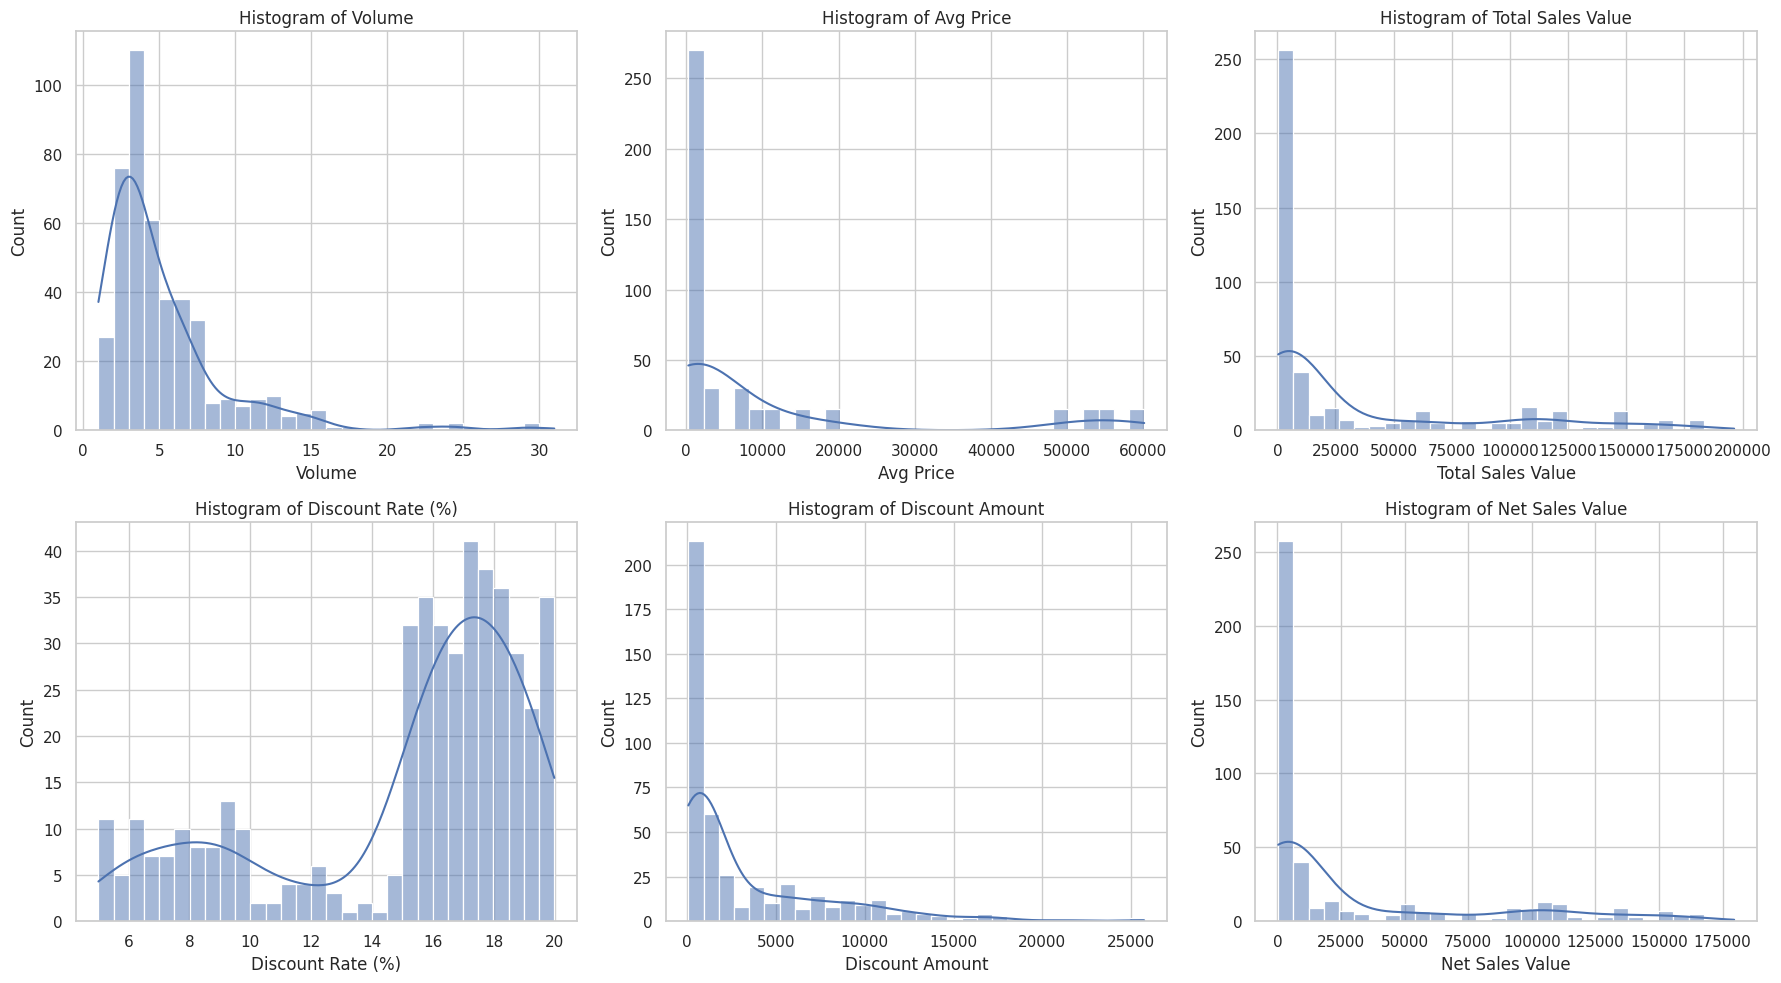

In [ ]:
# Visualize histograms
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

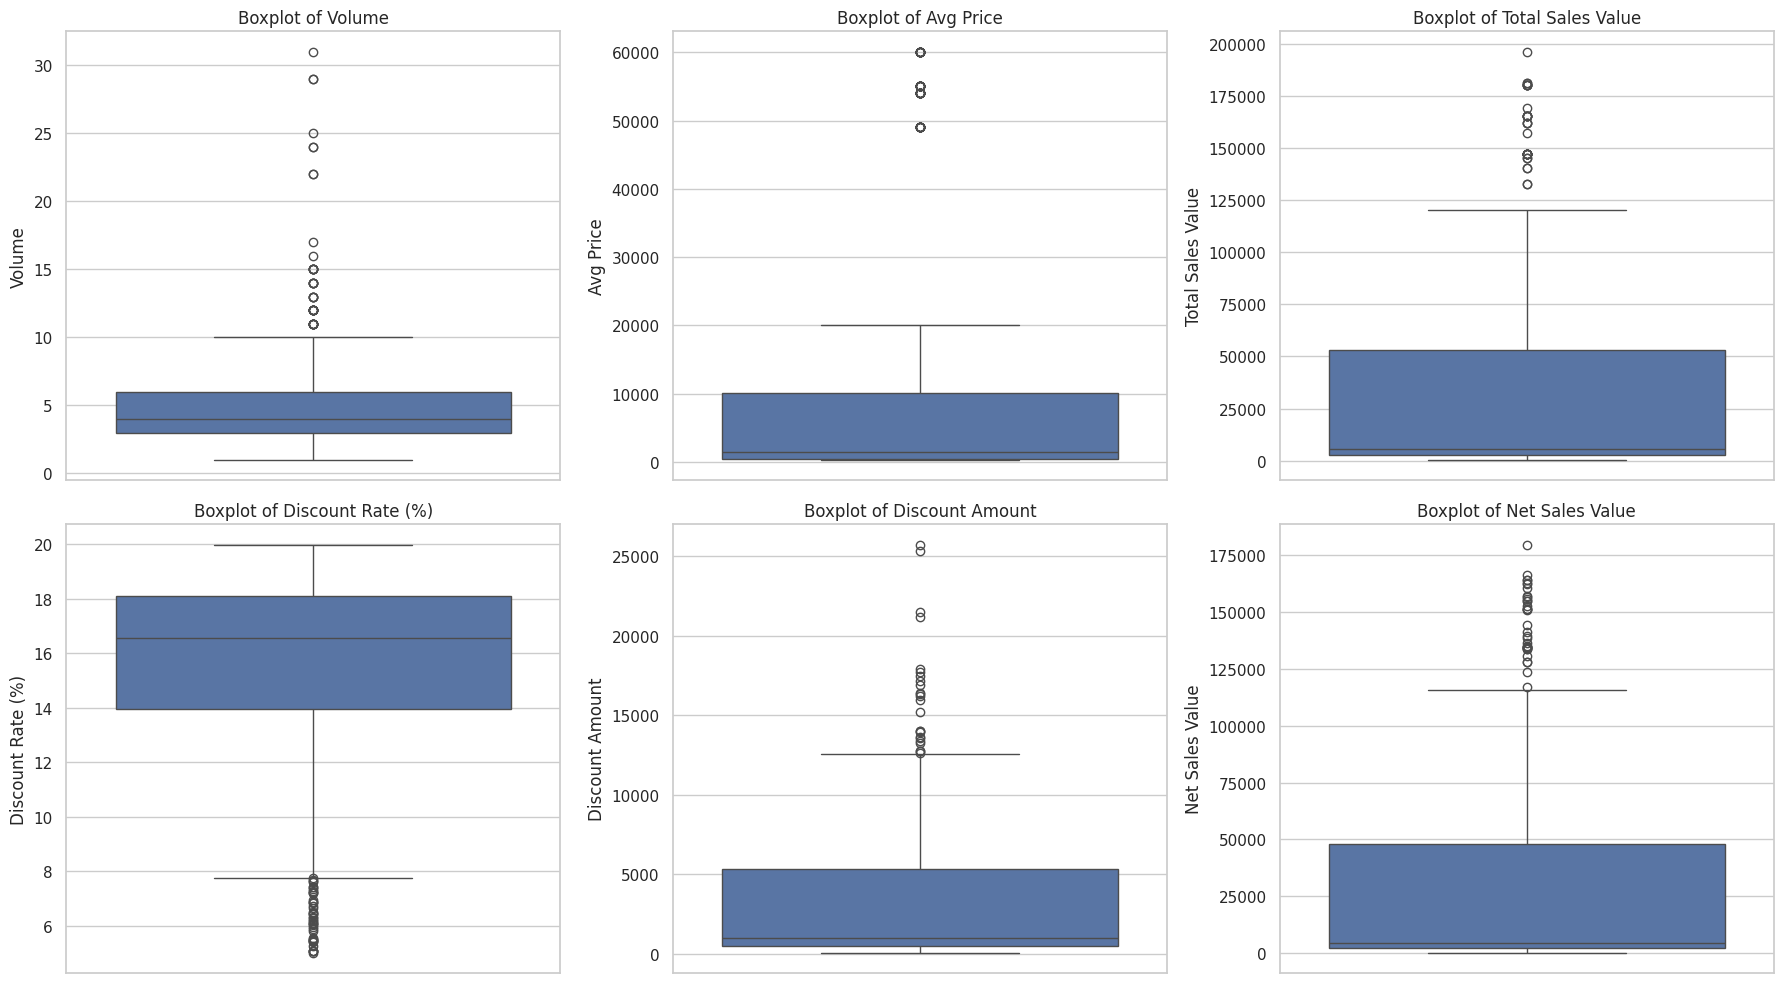

In [ ]:
# Visualize boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
# Standardization (Z-score normalization)
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nStandardized Data (first 5 rows):")
print(df_standardized[numerical_cols].head())


Standardized Data (first 5 rows):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  


In [ ]:
# Convert categorical data into dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataset after One-Hot Encoding (first 5 rows):")
print(df_encoded.head())


Dataset after One-Hot Encoding (first 5 rows):
         Date       Day  Volume  Avg Price  Total Sales Value  \
0  01-04-2021  Thursday      15      12100             181500   
1  01-04-2021  Thursday      10      10100             101000   
2  01-04-2021  Thursday       7      16100             112700   
3  01-04-2021  Thursday       6      20100             120600   
4  01-04-2021  Thursday       3       8100              24300   

   Discount Rate (%)  Discount Amount  Net Sales Value  SKU_F02  SKU_F03  ...  \
0          11.654820     21153.498820    160346.501180    False    False  ...   
1          11.560498     11676.102961     89323.897039    False    False  ...   
2           9.456886     10657.910157    102042.089843    False    False  ...   
3           6.935385      8364.074702    112235.925298    False    False  ...   
4          17.995663      4372.946230     19927.053770    False    False  ...   

   Model_Vedic Cream  Model_Vedic Oil  Model_Vedic Shampoo  Model_W-Casual

In [ ]:
# Save the preprocessed dataset
df_encoded.to_csv("preprocessed_sales_data.csv", index=False)
